# Actividad

Descripción de la data, limpieza,  eliminación de faltantes

Agrupación por PH y azúcar. Se genere un grafico de como se comportan otras variables quimicas relacionadas con el PH y el azucar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = "/content/winequality-red.csv"
df = pd.read_csv(filename)
df_copy= df
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df[df["alcohol"]==14.9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


In [8]:
df["pH"].value_counts()

3.30    57
3.36    56
3.26    53
3.38    48
3.39    48
        ..
3.75     1
2.74     1
3.70     1
3.85     1
2.90     1
Name: pH, Length: 89, dtype: int64

In [9]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [10]:
df.groupby(["pH"]).nunique()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
pH,,,,,,,,,,,
2.74,1,1,1,1,1,1,1,1,1,1,1
2.86,1,1,1,1,1,1,1,1,1,1,1
2.87,1,1,1,1,1,1,1,1,1,1,1
2.88,2,2,2,2,2,2,2,2,2,2,2
2.89,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
3.75,1,1,1,1,1,1,1,1,1,1,1
3.78,2,2,2,2,2,2,2,2,2,2,2
3.85,1,1,1,1,1,1,1,1,1,1,1


In [25]:
# filtro_ph1 = df["pH"]>2.53
# df_ph_1 = df[filtro_ph1]
# filtro_ph2 = df["pH"]<=2.53
# df_ph_2 = df[filtro_ph2]

In [11]:
valor_medio_sup=df.loc[df["residual sugar"]>2.53]
valor_medio_sup

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1585,7.2,0.390,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5


In [12]:
valor_medio_inf=df.loc[df["residual sugar"]<=2.53]
valor_medio_inf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


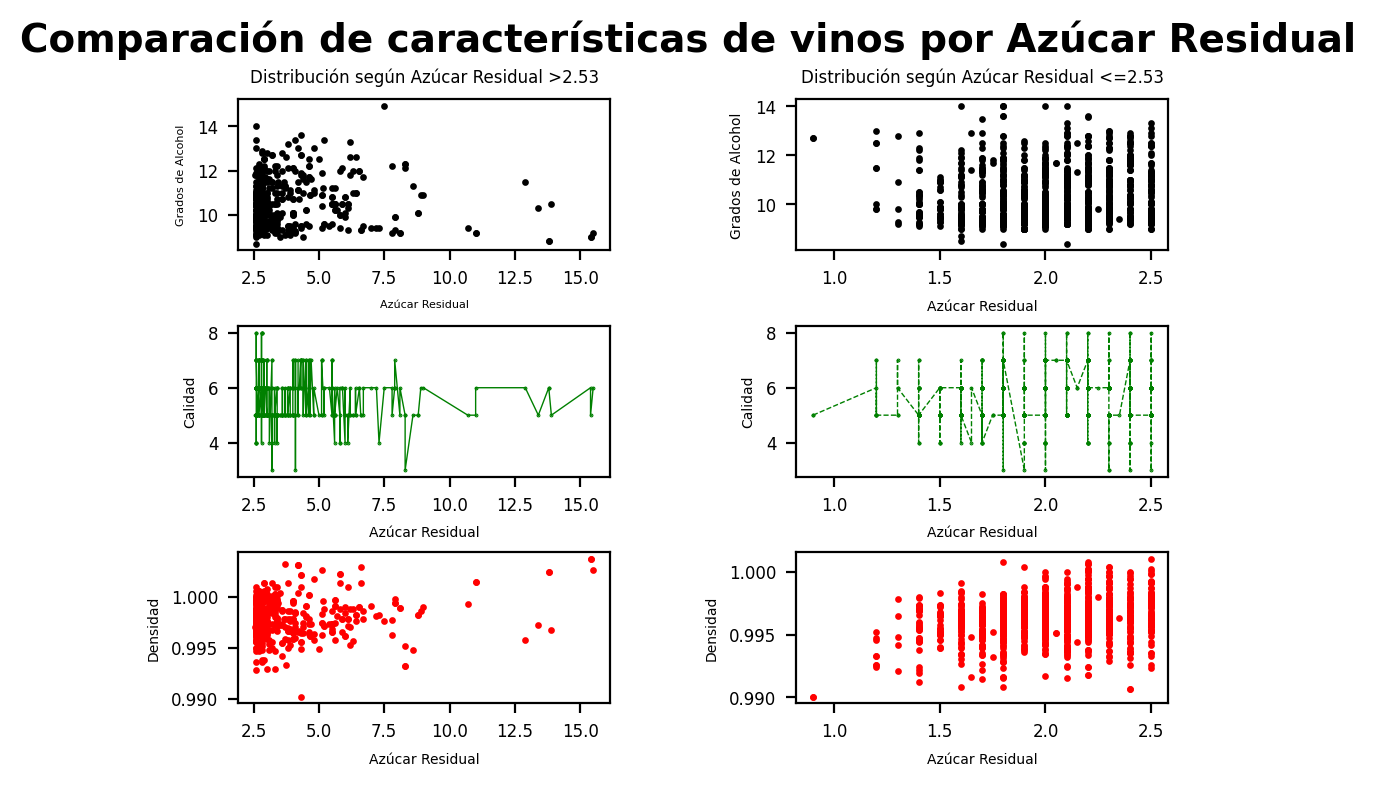

In [69]:
fig = plt.figure(dpi=200)
fig.suptitle("Comparación de características de vinos por Azúcar Residual", fontsize=14, fontweight="bold")
fig.subplots_adjust(hspace=0.5, wspace=0.5)

ax = fig.add_subplot(3,2,1)
ax.set_title("Distribución según Azúcar Residual >2.53", fontsize=6)
ax.set_xlabel("Azúcar Residual", fontsize=4)
ax.set_ylabel("Grados de Alcohol", fontsize=4)
ax.scatter(valor_medio_sup['residual sugar'],valor_medio_sup['alcohol'], s=2, c="black")
ax.tick_params(axis="x", labelsize=6)
ax.tick_params(axis="y", labelsize=6)


ax2 = fig.add_subplot(3,2,2)
ax2.set_title("Distribución según Azúcar Residual <=2.53", fontsize=6)
ax2.set_xlabel("Azúcar Residual", fontsize=5)
ax2.set_ylabel("Grados de Alcohol", fontsize=5)
ax2.scatter(valor_medio_inf['residual sugar'],valor_medio_inf['alcohol'], s=2, c="black")
ax2.tick_params(axis="x", labelsize=6)
ax2.tick_params(axis="y", labelsize=6)


ax3 = fig.add_subplot(3,2,3)
ax3.set_xlabel("Azúcar Residual", fontsize=5)
ax3.set_ylabel("Calidad", fontsize=5)
ax3.plot(valor_medio_sup['residual sugar'].sort_values(),valor_medio_sup['quality'], color="green", linewidth=0.5, marker='o', markersize=0.4)
ax3.tick_params(axis="x", labelsize=6)
ax3.tick_params(axis="y", labelsize=6)

ax4 = fig.add_subplot(3,2,4)
ax4.set_xlabel("Azúcar Residual", fontsize=5)
ax4.set_ylabel("Calidad", fontsize=5)
ax4.plot(valor_medio_inf['residual sugar'].sort_values(),valor_medio_inf['quality'], color="green", linewidth=0.5, marker="o", linestyle='dashed', markersize=0.4)
ax4.tick_params(axis="x", labelsize=6)
ax4.tick_params(axis="y", labelsize=6)

ax5 = fig.add_subplot(3,2,5)
ax5.set_xlabel("Azúcar Residual", fontsize=5)
ax5.set_ylabel("Densidad", fontsize=5)
ax5.scatter(valor_medio_sup['residual sugar'],valor_medio_sup['density'], s=2, c="red")
ax5.tick_params(axis="x", labelsize=6)
ax5.tick_params(axis="y", labelsize=6)

ax6 = fig.add_subplot(3,2,6)
ax6.set_xlabel("Azúcar Residual", fontsize=5)
ax6.set_ylabel("Densidad", fontsize=5)
ax6.scatter(valor_medio_inf['residual sugar'],valor_medio_inf['density'], s=2, c="red")
ax6.tick_params(axis="x", labelsize=6)
ax6.tick_params(axis="y", labelsize=6)

# fig.tight_layout()
plt.show()



In [35]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
